In [ ]:
"""
How does demand evolve over time per SKU?
Is there seasonality?
How do SKUs differ from each other?
"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("clean_sales.csv", parse_dates=["date"])

print(df.head())
print(df["sku_name"].unique())

        date         sku_name  sales  store
0 2013-01-01  Effortless Pant     49      1
1 2013-01-02  Effortless Pant     39      1
2 2013-01-03  Effortless Pant     57      1
3 2013-01-04  Effortless Pant     46      1
4 2013-01-05  Effortless Pant     45      1
['Effortless Pant' 'Sculpt Knit Tank' 'Super Puff Shorty'
 'TNA Sweatfleece Hoodie' 'Wilfred Sweater']


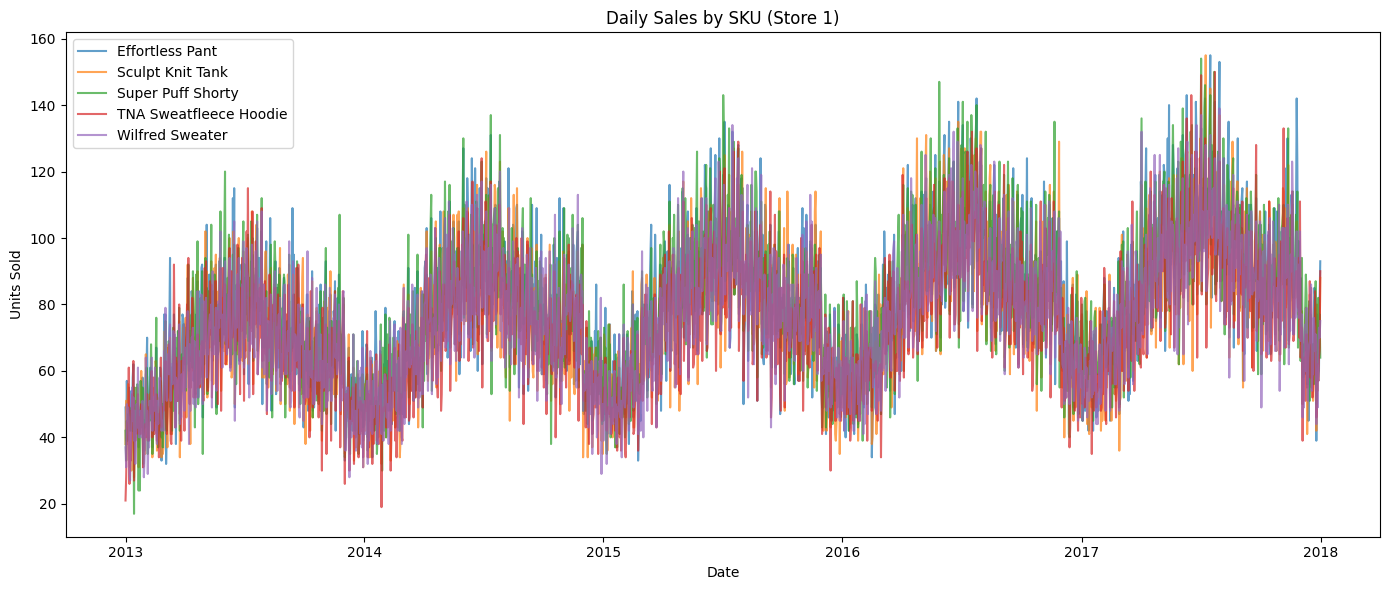

In [3]:
#Cell 2 — Daily Sales Over Time (Per SKU)
plt.figure(figsize=(14, 6))

for sku in df["sku_name"].unique():
    sku_df = df[df["sku_name"] == sku]
    plt.plot(sku_df["date"], sku_df["sales"], label=sku, alpha=0.7)

plt.title("Daily Sales by SKU (Store 1)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.tight_layout()
plt.show()

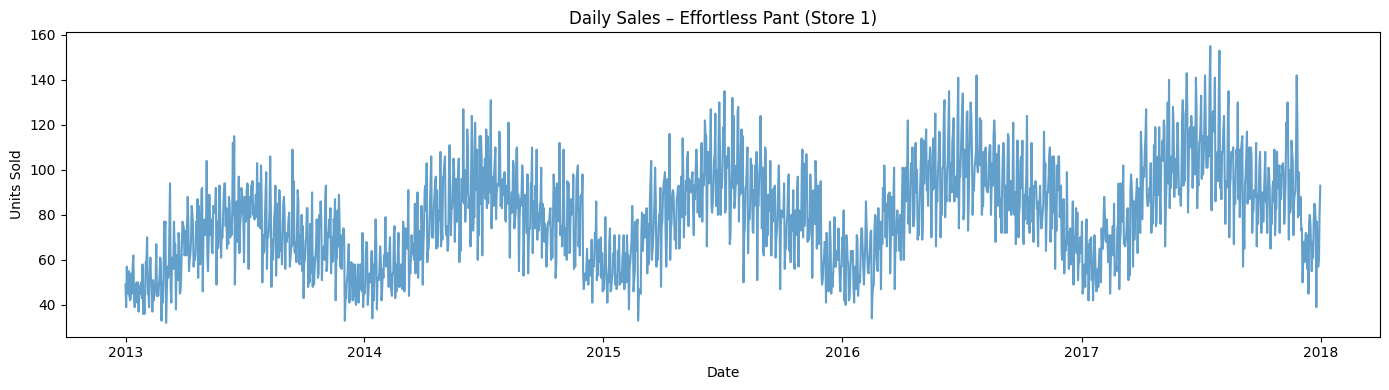

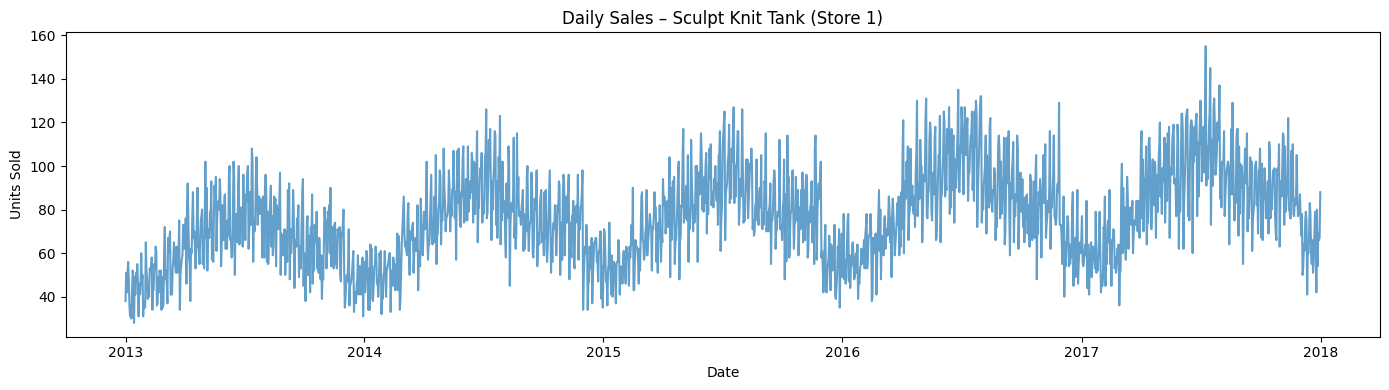

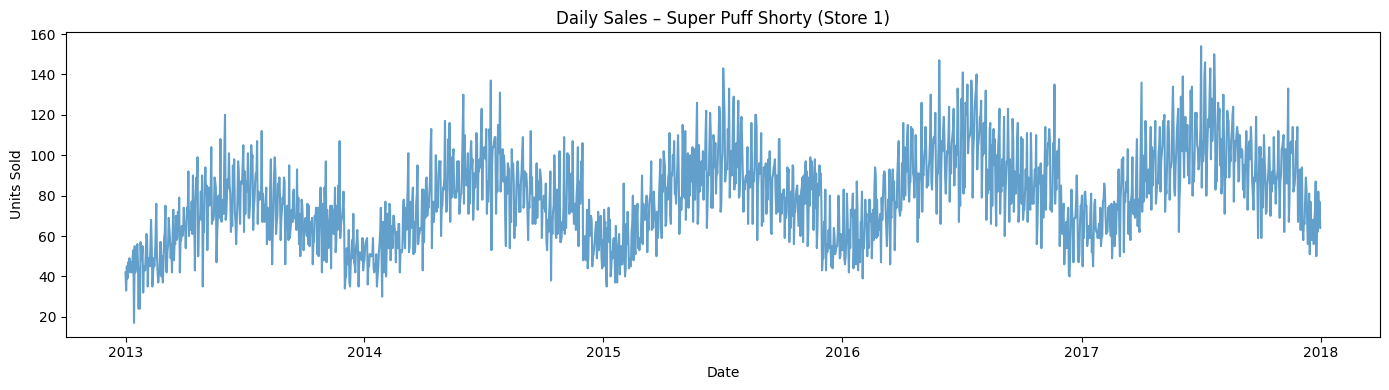

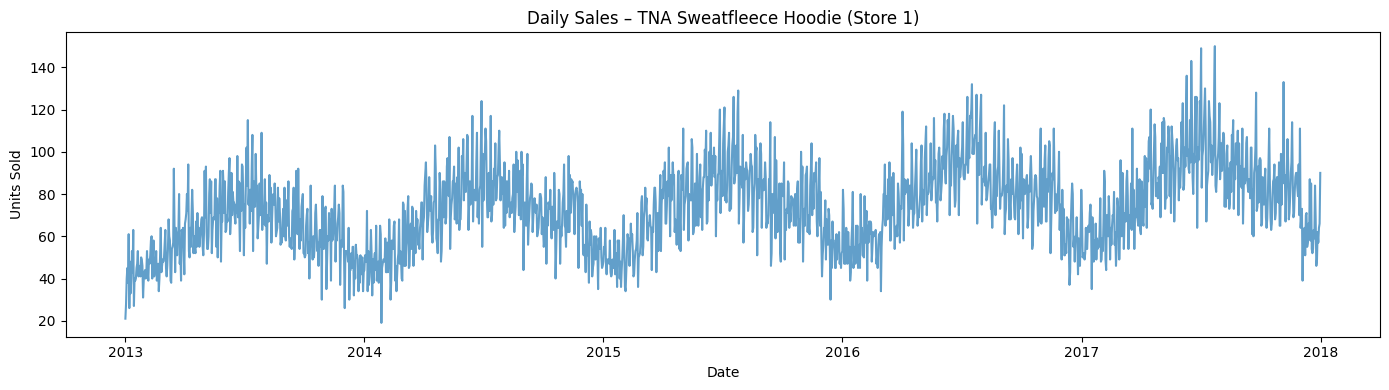

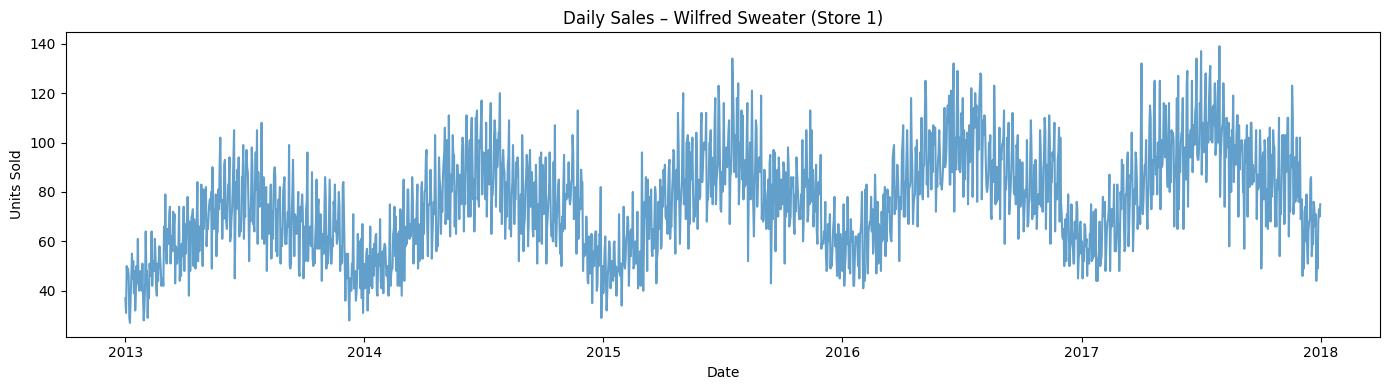

In [4]:
for sku in df["sku_name"].unique():
    sku_df = df[df["sku_name"] == sku]

    plt.figure(figsize=(14, 4))
    plt.plot(sku_df["date"], sku_df["sales"], alpha=0.7)
    plt.title(f"Daily Sales – {sku} (Store 1)")
    plt.xlabel("Date")
    plt.ylabel("Units Sold")
    plt.tight_layout()
    plt.show()

C:\Users\veera\AppData\Local\Temp\ipykernel_29152\2523781047.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df


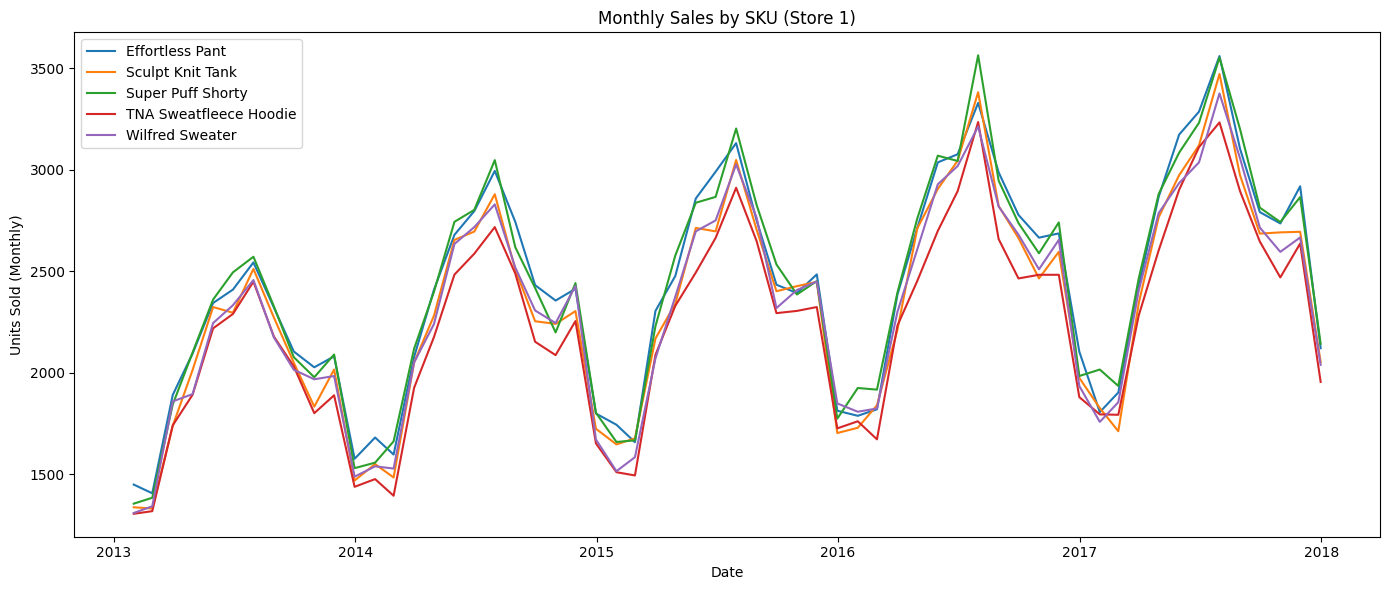

In [5]:
monthly = (
    df
    .set_index("date")
    .groupby("sku_name")["sales"]
    .resample("M")
    .sum()
    .reset_index()
)

plt.figure(figsize=(14, 6))

for sku in monthly["sku_name"].unique():
    sku_df = monthly[monthly["sku_name"] == sku]
    plt.plot(sku_df["date"], sku_df["sales"], label=sku)

plt.title("Monthly Sales by SKU (Store 1)")
plt.xlabel("Date")
plt.ylabel("Units Sold (Monthly)")
plt.legend()
plt.tight_layout()
plt.show()

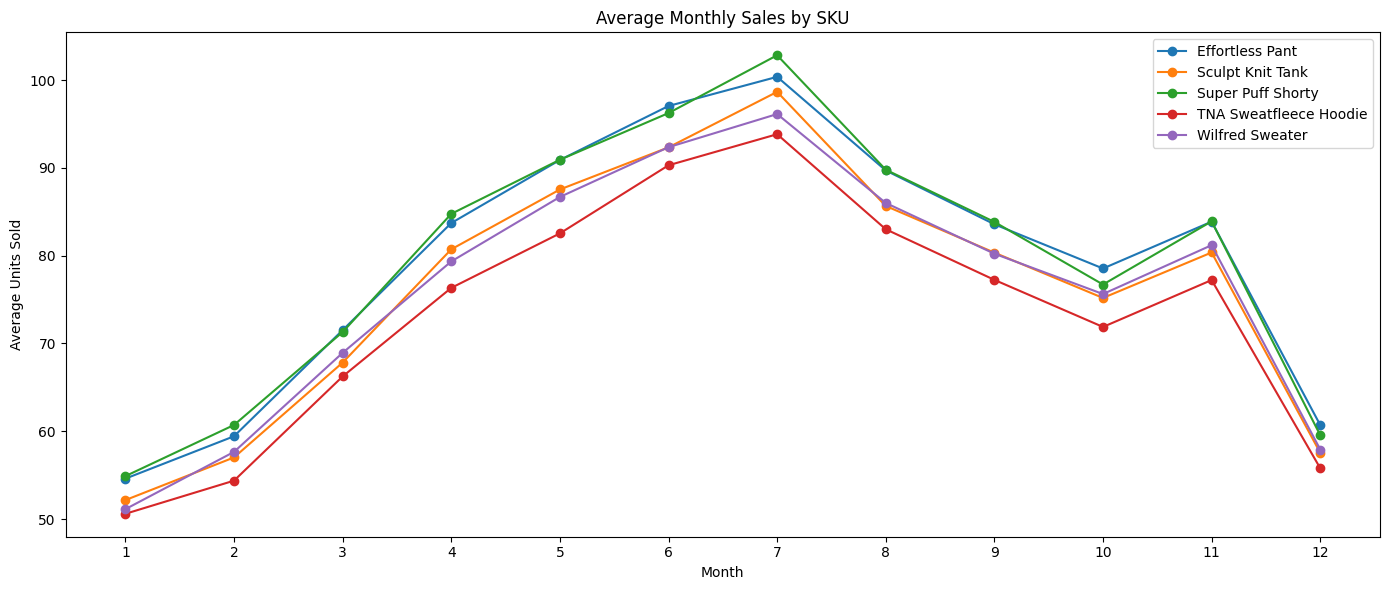

In [7]:
#Cell 3 — Monthly Seasonality
df["month"] = df["date"].dt.month

monthly_avg = (
    df.groupby(["sku_name", "month"])["sales"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(14, 6))

for sku in monthly_avg["sku_name"].unique():
    sku_df = monthly_avg[monthly_avg["sku_name"] == sku]
    plt.plot(sku_df["month"], sku_df["sales"], marker="o", label=sku)

plt.title("Average Monthly Sales by SKU")
plt.xlabel("Month")
plt.ylabel("Average Units Sold")
plt.xticks(range(1, 13))
plt.legend()
plt.tight_layout()
plt.show()


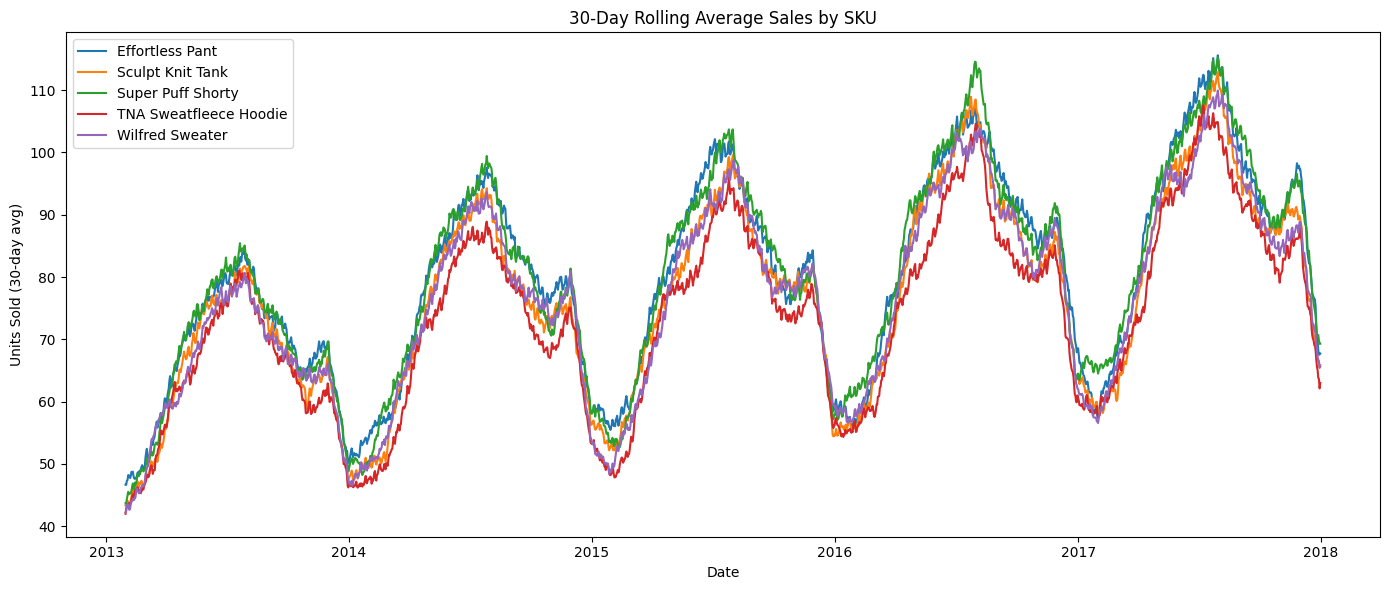

In [8]:
#Cell 4 — Rolling Averages
plt.figure(figsize=(14, 6))

for sku in df["sku_name"].unique():
    sku_df = df[df["sku_name"] == sku].copy()
    sku_df["rolling_30"] = sku_df["sales"].rolling(30).mean()
    plt.plot(sku_df["date"], sku_df["rolling_30"], label=sku)

plt.title("30-Day Rolling Average Sales by SKU")
plt.xlabel("Date")
plt.ylabel("Units Sold (30-day avg)")
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

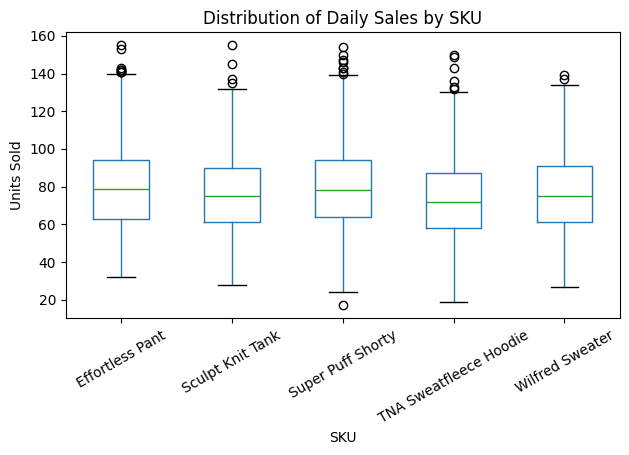

In [10]:
#Cell 5 — Distribution of Daily Sales
plt.figure(figsize=(12, 6))

df.boxplot(column="sales", by="sku_name", grid=False)
plt.title("Distribution of Daily Sales by SKU")
plt.suptitle("")
plt.xlabel("SKU")
plt.ylabel("Units Sold")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()